In [4]:
import pandas as pd
import os
from tqdm import tqdm
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import matplotlib
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
'''ANALYSIS by ARIL'''

'ANALYSIS by ARIL'

# READ ALL DATA

In [312]:
data=collections.defaultdict(None)
for i in os.listdir('.\\platinummetrix\\train'):
    if '.csv' in i:
        print(i)
        data[i.replace('.csv','')]=pd.read_csv('.\\platinummetrix\\train\\'+i)

demographics.csv
event_calendar.csv
historical_volume.csv
industry_soda_sales.csv
industry_volume.csv
price_sales_promotion.csv
weather.csv


# OVERVIEW

In [7]:
print(data['demographics'].shape)
data['demographics'].head(2)

(60, 3)


,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_05,3044268,182944
1,Agency_02,3137874,240809


In [8]:
print(data['historical_volume'].shape)
data['historical_volume'].head(3)

(21000, 4)


,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,201301,52.272
1,Agency_22,SKU_02,201301,110.700
2,Agency_58,SKU_23,201301,0.000


In [9]:
data['historical_volume'].drop('YearMonth', axis=1).groupby(['Agency','SKU']).mean()

Volume
Agency    SKU                 
Agency_01 SKU_01     83.523600
          SKU_02     66.898800
          SKU_03     40.777465
          SKU_04    191.208123
          SKU_05     20.484120
          SKU_11     18.162095
Agency_02 SKU_01   7196.863000
          SKU_02   7996.260725
          SKU_03  14766.299648
          SKU_04   4078.060653
          SKU_05   2116.632547
          SKU_11      7.430795
          SKU_12     30.466250
          SKU_31     41.189375
          SKU_34     72.216000
Agency_03 SKU_01   2277.365400
          SKU_02    781.736400
          SKU_03  10183.428542
          SKU_04   1684.876862
          SKU_05    734.237860
          SKU_32      3.875287
Agency_04 SKU_01     32.644800
          SKU_02      8.463600
          SKU_03    588.746845
          SKU_04     99.220615
          SKU_05      2.187150
Agency_05 SKU_01  12595.021300
          SKU_02   1289.556000
          SKU_03   1035.381748
          SKU_04   4207.805943
...                        ...
Agency_57 SKU_01   9394.025200
          SKU_02   5164.865950
          SKU_03   1196.353472
          SKU_04   2178.829418
          SKU_05   2182.499245
          SKU_07    131.171750
          SKU_17      2.036948
          SKU_23      1.890000
Agency_58 SKU_01   6539.122975
          SKU_02   4065.557400
          SKU_03    301.496200
          SKU_04   1728.007598
          SKU_05   1495.678010
          SKU_07     42.937250
          SKU_17      1.191388
          SKU_23      1.224000
Agency_59 SKU_01   8510.392925
          SKU_02   3966.611400
          SKU_03    765.455720
          SKU_04   1551.232077
          SKU_05   1579.566643
          SKU_07     15.376875
          SKU_17      1.248472
Agency_60 SKU_01  11752.066850
          SKU_02   4542.708600
          SKU_03    445.842970
          SKU_04   1978.089095
          SKU_05   2021.692300
          SKU_07     72.459375
          SKU_23      0.972000

[350 rows x 1 columns]

In [10]:
data['historical_volume']['merge']=data['historical_volume'].apply(lambda x: x['Agency']+x['SKU'], axis=1)

In [11]:
print(data['price_sales_promotion'].shape)
data['price_sales_promotion'].head(3)

(21000, 6)


,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,201301,1141.50000,1033.432731,108.067269
1,Agency_01,SKU_01,201302,1141.50000,1065.417195,76.082805
2,Agency_01,SKU_01,201303,1179.34582,1101.133633,78.212187


In [12]:
data['price_sales_promotion'].drop('YearMonth', axis=1).groupby(['Agency','SKU']).mean()

Price        Sales  Promotions
Agency    SKU                                         
Agency_01 SKU_01  1408.266611  1240.792393  167.474218
          SKU_02  1391.672418  1214.700978  176.971441
          SKU_03  1446.297935  1289.937659  156.360276
          SKU_04  2133.533294  1786.197136  347.336158
          SKU_05  1679.641904  1509.008222  170.633682
          SKU_11  1734.529192  1612.140258  122.388935
Agency_02 SKU_01  1333.066022  1169.480045  163.585977
          SKU_02  1335.236732  1182.832598  152.404134
          SKU_03  1465.070132  1259.483975  205.586158
          SKU_04  2061.092990  1805.059882  256.033108
          SKU_05  1623.193503  1399.753801  223.439702
          SKU_11   468.603777   422.552146   46.051630
          SKU_12  1008.583965  1011.782023    3.198058
          SKU_31  1041.339353  1021.771203   21.327624
          SKU_34  1023.395653  1011.984673   11.817325
Agency_03 SKU_01  1411.660991  1214.555379  197.105612
          SKU_02  1409.294148  1233.555518  175.738630
          SKU_03  1484.781900  1267.479331  217.302570
          SKU_04  2125.859138  1821.594718  304.264420
          SKU_05  1648.068539  1437.344357  210.724182
          SKU_32  1485.250687  1339.578430  146.025198
Agency_04 SKU_01  1410.225599  1271.387989  138.837609
          SKU_02  1408.190251  1253.880444  154.309807
          SKU_03  1477.995290  1282.260764  195.734526
          SKU_04  2107.723053  1818.160612  289.562441
          SKU_05  1561.747305  1409.879616  151.867690
Agency_05 SKU_01  1418.446636  1208.921570  209.525066
          SKU_02  1418.429104  1223.937751  194.491352
          SKU_03  1509.169320  1314.901817  194.267503
          SKU_04  2094.912209  1788.239792  306.672417
...                       ...          ...         ...
Agency_57 SKU_01  1417.033696  1214.570428  202.463268
          SKU_02  1411.825041  1214.606157  197.218884
          SKU_03  1479.368193  1302.359723  177.008470
          SKU_04  2095.685005  1834.219013  261.465992
          SKU_05  1597.290590  1412.725906  184.564684
          SKU_07  1427.093535  1352.097795   74.995739
          SKU_17   973.991032   859.034159  114.956873
          SKU_23  1701.220373  1496.293221  206.021299
Agency_58 SKU_01  1424.376672  1205.204303  219.172369
          SKU_02  1421.334645  1211.346981  209.987664
          SKU_03  1466.427223  1310.508318  155.918905
          SKU_04  2083.115468  1702.810535  380.304932
          SKU_05  1587.804650  1389.540316  198.264334
          SKU_07  1444.357631  1350.419197   93.938433
          SKU_17   873.077558   762.469742  110.607816
          SKU_23  1559.547964   769.138461  790.567003
Agency_59 SKU_01  1420.165241  1239.092399  181.072842
          SKU_02  1417.865128  1248.207897  169.657230
          SKU_03  1483.876020  1338.074753  145.801267
          SKU_04  2079.972774  1765.944722  314.028052
          SKU_05  1595.089211  1439.878314  155.210897
          SKU_07  1360.853676  1276.124827   84.728849
          SKU_17   770.995680   697.477382   73.518298
Agency_60 SKU_01  1420.560491  1224.196541  196.363950
          SKU_02  1417.925365  1228.304208  189.621158
          SKU_03  1485.257104  1355.629061  129.628043
          SKU_04  2089.345757  1832.614024  256.731733
          SKU_05  1595.894852  1432.265710  163.629142
          SKU_07  1419.216980  1291.361958  127.855022
          SKU_23  1623.291514  1505.075018  118.216496

[350 rows x 3 columns]

In [13]:
data['price_sales_promotion']['merge']=data['price_sales_promotion'].apply(lambda x: x['Agency']+x['SKU'], axis=1)

In [14]:
print(data['weather'].shape)
data['weather'].tail()

(3600, 3)


,YearMonth,Agency,Avg_Max_Temp
3595,201708,Agency_60,28.417411
3596,201709,Agency_60,27.591111
3597,201710,Agency_60,27.558824
3598,201711,Agency_60,27.674091
3599,201712,Agency_60,23.081069


## data industry

In [15]:
industry=data['industry_soda_sales'].merge(data['industry_volume'], on='YearMonth')
industry.tail(3)

,YearMonth,Soda_Volume,Industry_Volume
57,201710,996763883,616747012
58,201711,967899589,592195062
59,201712,919709619,618073219


## data industry and event

In [16]:
industry.merge(data['event_calendar'], on='YearMonth', how='outer').tail()

,YearMonth,Soda_Volume,Industry_Volume,Easter Day,Good Friday,New Year,Christmas,Labor Day,Independence Day,Revolution Day Memorial,Regional Games,FIFA U-17 World Cup,Football Gold Cup,Beer Capital,Music Fest
56,201709,984438234.0,604571152.0,0,0,0,0,0,1,0,0,0,0,0,0
57,201710,996763883.0,616747012.0,0,0,0,0,0,0,0,0,0,0,0,0
58,201711,967899589.0,592195062.0,0,0,0,0,0,0,1,0,0,0,1,0
59,201712,919709619.0,618073219.0,0,0,0,1,0,0,0,0,0,0,0,0
60,201801,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0


# data historical price SKU


In [17]:
his=data['historical_volume'].groupby(['Agency','SKU','YearMonth']).mean()
price=data['price_sales_promotion'].groupby(['Agency','SKU','YearMonth']).mean()
hist_price=his.merge(price, left_index=True, right_index=True)
hist_price

Volume        Price        Sales   Promotions
Agency    SKU    YearMonth                                                
Agency_01 SKU_01 201301      80.676  1141.500000  1033.432731   108.067269
                 201302      98.064  1141.500000  1065.417195    76.082805
                 201303     133.704  1179.345820  1101.133633    78.212187
                 201304     147.312  1226.687500  1138.283357    88.404143
                 201305     175.608  1230.331104  1148.969634    81.361470
                 201306     180.792  1234.832064  1144.291368    90.540696
                 201307     149.796  1234.868827  1157.884598    76.984229
                 201308     161.136  1234.828586  1186.746188    48.082398
                 201309     147.744  1234.802266  1152.156204    82.646062
                 201310     149.364  1235.169062  1142.945273    92.223789
                 201311      95.364  1235.187500  1133.686722   101.500778
                 201312     104.544  1235.187500  1059.479533   175.707967
                 201401     100.548  1235.187500   995.006244   240.181256
                 201402     123.552  1235.187500  1111.858392   123.329108
                 201403     125.172  1235.187500  1108.242181   126.945319
                 201404      70.524  1235.187500  1109.019047   126.168453
                 201405      21.924  1264.272500  1257.190000     7.082500
                 201406      66.744  1272.981618  1265.540441     7.441177
                 201407      89.100  1275.481360  1271.486842     3.994518
                 201408     107.352  1285.586058  1239.516347    46.069711
                 201409     100.872  1303.636331  1198.774971   104.861360
                 201410     113.292  1302.556490  1248.267052    54.289438
                 201411      68.148  1301.595553  1241.662660    59.932893
                 201412      75.492  1301.676949  1224.717900    76.959049
                 201501      41.580  1300.773539  1241.486851    59.286688
                 201502      58.320  1302.179167  1240.457176    61.721991
                 201503      87.372  1302.620523  1181.618015   121.002508
                 201504      81.000  1348.404033  1201.805041   146.598992
                 201505      91.908  1366.276385  1202.500495   163.775890
                 201506      86.616  1418.312500  1255.380860   162.931640
...                             ...          ...          ...          ...
Agency_60 SKU_23 201507       0.000     0.000000     0.000000     0.000000
                 201508       0.000     0.000000     0.000000     0.000000
                 201509       0.000     0.000000     0.000000     0.000000
                 201510       0.000     0.000000     0.000000     0.000000
                 201511       0.000     0.000000     0.000000     0.000000
                 201512       4.590  4242.225000  1936.667935  2305.557065
                 201601       3.330  3828.349391  2855.742073   972.607318
                 201602       2.790  4242.225000  3338.025000   904.200000
                 201603       2.790  4242.225000  3514.986428   727.238572
                 201604       4.410  4242.225000  3590.250000   651.975000
                 201605       3.780  4242.225000  3891.533333   350.691667
                 201606       2.880  4244.556429  4066.367143   178.189286
                 201607       2.970  4252.425000  4140.940541   111.484459
                 201608       2.340  4252.425000  4126.621875   125.803125
                 201609       3.600  4252.425000  4204.584375    47.840625
                 201610       2.070  4252.395000  4123.149000   129.246000
                 201611       0.360     0.000000     0.000000     0.000000
                 201612       3.510  4254.465000  4204.909286    49.555714
                 201701       2.160  4258.481250  4183.884375    74.596875
                 201702       2.520  4261.294565  4087.082609   174.211956
                 201703       1.710  4259.769000  4126

# MAKE DATA TRAINING

In [18]:
#merge data historical__volume with price_sales_promotion and with data weather
df_train=data['historical_volume'].merge(data['price_sales_promotion'],
                                on=['Agency','SKU','YearMonth'])\
                        .merge(data['weather'], on=['YearMonth','Agency'])
    
data['demographics']['Year']=2017    
#define coolumn Year to merge with data weather
df_train['Year'] = df_train.YearMonth.transform(lambda x: str(x)[:4]).astype(int) 
df_train = df_train.merge(data['demographics'], on=['Year','Agency'], how='left')

#merge with data industry and event calendar
df_train=df_train.merge(industry, on='YearMonth').merge(data['event_calendar'], on='YearMonth', how='outer')

df_train.drop('Year', inplace=True, axis=1)
#change Year Month tobe datetime
df_train['YearMonth']=df_train.YearMonth.transform(lambda x: pd.Timestamp.strptime(str(x),'%Y%m'))

#change string tobe cagorical type for reduce memory
df_train=df_train.dropna(subset=['Agency'])
df_train['Agency']=df_train.Agency.transform(lambda c: c.split('_')[1]).astype('category')
df_train['SKU']=df_train.SKU.transform(lambda c: c.split('_')[1]).astype('category')
df_train['event_count']=df_train.apply(lambda x:x[['Easter Day', 'Good Friday', 'New Year', 'Christmas', 'Labor Day',
       'Independence Day', 'Revolution Day Memorial', 'Regional Games ',
       'FIFA U-17 World Cup', 'Football Gold Cup', 'Beer Capital',
       'Music Fest']].sum(), axis=1)

df_train.to_csv('all_data.csv', index=False)


In [16]:
df_train.columns

Index(['Agency', 'SKU', 'YearMonth', 'Volume', 'merge_x', 'Price', 'Sales',
       'Promotions', 'merge_y', 'Avg_Max_Temp', 'Avg_Population_2017',
       'Avg_Yearly_Household_Income_2017', 'Soda_Volume', 'Industry_Volume',
       'Easter Day', 'Good Friday', 'New Year', 'Christmas', 'Labor Day',
       'Independence Day', 'Revolution Day Memorial', 'Regional Games ',
       'FIFA U-17 World Cup', 'Football Gold Cup', 'Beer Capital',
       'Music Fest', 'event_count'],
      dtype='object')

# 1. SKU Recommendations

clustering to find out the characteristics of Agency-6 and Agency-14

### 1. by weather

In [17]:
df=data['weather'].groupby('Agency')['Avg_Max_Temp'].agg(['mean','median']).reset_index()

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df[['mean','median']])
    centers = clusterer.cluster_centers_

    score = silhouette_score (df[['mean','median']], preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6419777083326792)
For n_clusters = 3, silhouette score is 0.6304471024266756)
For n_clusters = 4, silhouette score is 0.6871265957424055)
For n_clusters = 5, silhouette score is 0.693996012508526)
For n_clusters = 6, silhouette score is 0.6962556604480968)
For n_clusters = 7, silhouette score is 0.7134342576595893)
For n_clusters = 8, silhouette score is 0.6711714248861864)
For n_clusters = 9, silhouette score is 0.7015117043368981)


Based on the data above, I chose clustering to be 7 cluster

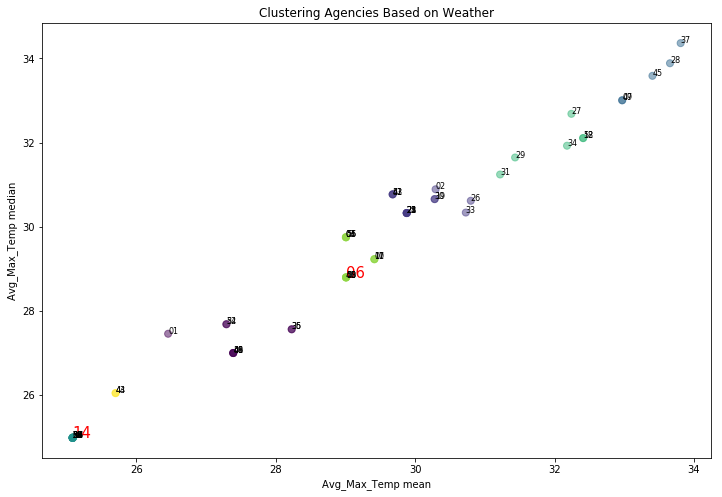

In [27]:
kmeans = KMeans(n_clusters=7).fit(df[['mean','median']])
centroids = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=[12,8])
ax.scatter(df['mean'], df['median'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
for i, txt in enumerate(df['Agency']):
    if txt =='Agency_06' or txt=='Agency_14':
        ax.annotate(txt.replace('Agency_',''), (df['mean'][i], df['median'][i]), fontsize=15, color='red')
    else:
        ax.annotate(txt.replace('Agency_',''), (df['mean'][i], df['median'][i]), fontsize=8)
plt.title('Clustering Agencies Based on Weather')
plt.xlabel('Avg_Max_Temp mean')
plt.ylabel('Avg_Max_Temp median')

In [31]:
df_cluster_weather=df.join(pd.DataFrame(kmeans.labels_,columns=['cluster']))
df_cluster_weather_06=df_cluster_weather[df_cluster_weather['cluster']==(df_cluster_weather[df_cluster_weather['Agency']=='Agency_06']['cluster'].tolist()[0])]
df_cluster_weather_06

,Agency,mean,median,cluster
2,Agency_03,29.006522,29.746955,5
3,Agency_04,29.006522,29.746955,5
4,Agency_05,29.007939,28.791272,5
5,Agency_06,29.007939,28.791272,5
6,Agency_07,29.414553,29.225082,5
7,Agency_08,29.007939,28.791272,5
9,Agency_10,29.414553,29.225082,5
10,Agency_11,29.414553,29.225082,5
39,Agency_40,29.007939,28.791272,5
49,Agency_50,29.007939,28.791272,5


In [32]:
print('characteristics of Agency_06 have the same weather like',end=' ')
for i in df_cluster_weather_06['Agency']:
    if i=='Agency_06':
        continue
    print(i,end=', ')


characteristics of Agency_06 have the same weather like Agency_03, Agency_04, Agency_05, Agency_07, Agency_08, Agency_10, Agency_11, Agency_40, Agency_50, Agency_55, Agency_56, 

In [33]:
df_cluster_weather_14=df_cluster_weather[df_cluster_weather['cluster']==(df_cluster_weather[df_cluster_weather['Agency']=='Agency_14']['cluster'].tolist()[0])]
df_cluster_weather_14.head()

,Agency,mean,median,cluster
11,Agency_12,25.085281,24.977237,3
12,Agency_13,25.085281,24.977237,3
13,Agency_14,25.085281,24.977237,3
14,Agency_15,25.085281,24.977237,3
15,Agency_16,25.085281,24.977237,3


In [34]:
print('characteristics of Agency_14 have the same weather like',end=' ')
for i in df_cluster_weather_14['Agency']:
    if i=='Agency_14':
        continue
    print(i,end=', ')


characteristics of Agency_14 have the same weather like Agency_12, Agency_13, Agency_15, Agency_16, Agency_17, Agency_20, Agency_38, Agency_39, Agency_57, Agency_58, Agency_59, Agency_60, 

### 2. by demographis


In [35]:
data['demographics']=data['demographics'].drop('Year', axis=1)
df=data['demographics'][['Avg_Population_2017','Avg_Yearly_Household_Income_2017']]
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.8313197016646543)
For n_clusters = 3, silhouette score is 0.8321346196599574)
For n_clusters = 4, silhouette score is 0.7271402198323226)
For n_clusters = 5, silhouette score is 0.761966711663451)
For n_clusters = 6, silhouette score is 0.7525791587289407)
For n_clusters = 7, silhouette score is 0.6588064195464508)
For n_clusters = 8, silhouette score is 0.6413133750306816)
For n_clusters = 9, silhouette score is 0.6378007716370967)


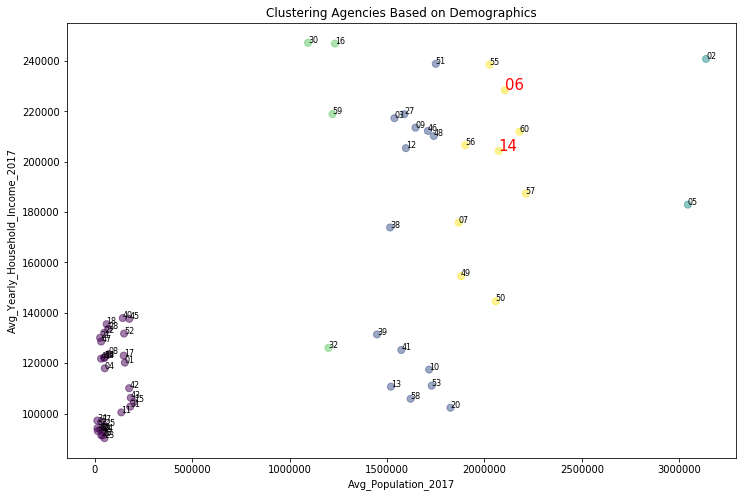

In [38]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=[12,8])
ax.scatter(df['Avg_Population_2017'], df['Avg_Yearly_Household_Income_2017'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
for i, txt in enumerate(data['demographics']['Agency']):
    if txt =='Agency_06' or txt=='Agency_14':
        ax.annotate(txt.replace('Agency_',''), (df['Avg_Population_2017'][i], df['Avg_Yearly_Household_Income_2017'][i]), fontsize=15, color='red')
    else:
        ax.annotate(txt.replace('Agency_',''), (df['Avg_Population_2017'][i], df['Avg_Yearly_Household_Income_2017'][i]), fontsize=8)
plt.title('Clustering Agencies Based on Demographics')
plt.xlabel('Avg_Population_2017')
plt.ylabel('Avg_Yearly_Household_Income_2017')

Based on the data above, agency_06 and agency_14 have the same demographic

In [39]:
df_cluster_demo = data['demographics'].join(pd.DataFrame(kmeans.labels_,columns=['cluster']))

df_cluster_demo_06_and_14 = df_cluster_demo[df_cluster_demo['cluster']==(df_cluster_demo[df_cluster_demo['Agency']=='Agency_06']['cluster'].tolist()[0])]

In [40]:
print('characteristics of Agency_06 and Agency_14 have the same demographics like',end=' ')
for i in df_cluster_demo_06_and_14['Agency']:
    if i=='Agency_06' or i=='Agency_14':
        continue
    print(i,end=', ')


characteristics of Agency_06 and Agency_14 have the same demographics like Agency_55, Agency_50, Agency_07, Agency_49, Agency_60, Agency_57, Agency_56, 


### 3. combine weather and demographics

In [41]:
result_06=df_cluster_demo_06_and_14.drop('cluster', axis=1)\
                    .merge(df_cluster_weather_06.drop('cluster', axis=1), on='Agency')

result_14=df_cluster_demo_06_and_14.drop('cluster', axis=1)\
                    .merge(df_cluster_weather_14.drop('cluster', axis=1), on='Agency')

### result agency 06 and agency 14

In [42]:
print('Based on weather and demographis characteristic, Agency_06 have the same characters like ',end='')
for i in result_06['Agency']:
    if '06' not in i:
        print(i, end=', ')

Based on weather and demographis characteristic, Agency_06 have the same characters like Agency_55, Agency_50, Agency_07, Agency_56, 

In [46]:
result_06

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017,mean,median
0,Agency_55,2025793,238553,29.006522,29.746955
1,Agency_50,2057678,144594,29.007939,28.791272
2,Agency_07,1868030,175785,29.414553,29.225082
3,Agency_06,2104390,228353,29.007939,28.791272
4,Agency_56,1901290,206553,29.006522,29.746955


In [43]:
print('Based on weather and demographis characteristic, Agency_14 have the same characters like ',end='')
for i in result_14['Agency']:
    if '14' not in i:
        print(i, end=', ')

Based on weather and demographis characteristic, Agency_14 have the same characters like Agency_60, Agency_57, 

# get best SKU for agency 06 and 14 by volume

### agency 06

In [48]:
sku_06=data['historical_volume'][data['historical_volume']['Agency'].isin(result_06['Agency'].tolist())]
sku_06.groupby(['SKU'])['Volume'].agg(['mean','median']).reset_index().rename(columns={'mean':'Volume mean','median':'Volume median'})

,SKU,Volume mean,Volume median
0,SKU_01,5169.044275,4204.440000
1,SKU_02,4030.396769,1264.248000
2,SKU_03,3284.313364,2156.538750
3,SKU_04,2376.042627,2282.316375
4,SKU_05,1226.877864,256.654350
5,SKU_17,1.843868,0.000000
6,SKU_21,1.281195,0.000000


### agency 14

In [53]:
sku_14=data['historical_volume'][data['historical_volume']['Agency'].isin(result_14['Agency'].tolist())]
sku_14.groupby(['SKU'])['Volume'].agg(['mean','median']).reset_index()\
            .rename(columns={'mean':'Volume mean','median':'Volume median'}).sort_values(['Volume mean','Volume median'], ascending=False)

,SKU,Volume mean,Volume median
0,SKU_01,10573.046025,10544.09550
1,SKU_02,4853.787275,4506.40800
4,SKU_05,2102.095772,1975.59000
3,SKU_04,2078.459256,2031.50895
2,SKU_03,821.098221,782.76150
5,SKU_07,101.815562,92.70375
6,SKU_17,2.036948,0.00000
7,SKU_23,1.431000,0.00000


## summary SKU recomendation

SKU_01 and SKU_02 are the best SKU for Agency_06 and Agency_14

In [54]:
sku_recomendation=pd.read_csv('./platinummetrix/test/sku_recommendation.csv')
sku_recomendation['SKU'][:2]=['SKU_01','SKU_02']
sku_recomendation['SKU'][2:]=['SKU_01','SKU_02']
sku_recomendation

C:\Users\eBdesk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Agency,SKU
0,Agency_06,SKU_01
1,Agency_06,SKU_02
2,Agency_14,SKU_01
3,Agency_14,SKU_02


# FORECASTING

In [55]:
df_train.columns

Index(['Agency', 'SKU', 'YearMonth', 'Volume', 'merge_x', 'Price', 'Sales',
       'Promotions', 'merge_y', 'Avg_Max_Temp', 'Avg_Population_2017',
       'Avg_Yearly_Household_Income_2017', 'Soda_Volume', 'Industry_Volume',
       'Easter Day', 'Good Friday', 'New Year', 'Christmas', 'Labor Day',
       'Independence Day', 'Revolution Day Memorial', 'Regional Games ',
       'FIFA U-17 World Cup', 'Football Gold Cup', 'Beer Capital',
       'Music Fest', 'event_count'],
      dtype='object')


### overview data Volume per YearMonth

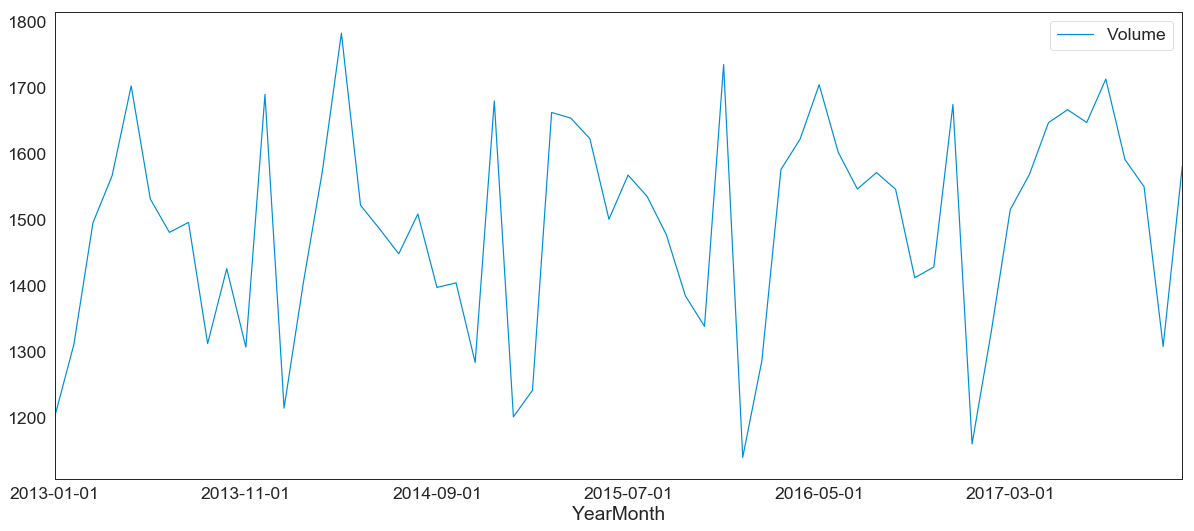

In [794]:
df_train=pd.read_csv('all_data.csv')
df=df_train[['YearMonth','Volume']].groupby('YearMonth').mean()
df.plot()

Based on graph, data volume looks like Seasonal data without trend. So i chose ARMA method for forecasting cause this method is suitable for univariate time series without trend and seasonal components.

# univariate forecasting

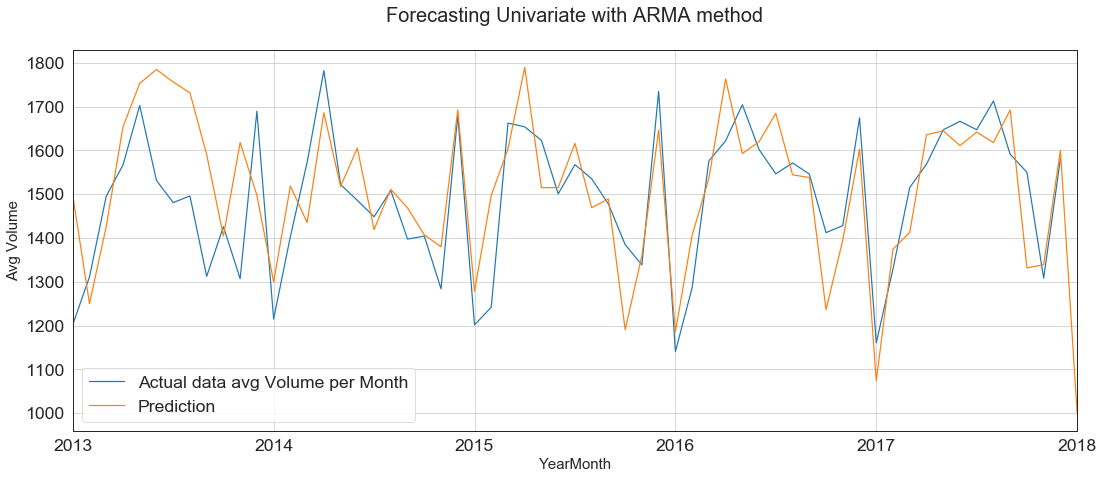

In [284]:
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data_arma = df_train.groupby('YearMonth')['Volume'].mean().values

# # fit model
model = ARMA(data_arma, order=(12,9))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(0, len(data_arma))
result=pd.DataFrame(yhat).join(pd.DataFrame(df_train.groupby('YearMonth')['Volume'].mean()).reset_index())
result['YearMonth'][60]='2018-01-01'
sns.set_context("paper", font_scale=2.)
sns.set_style('white')
dg=result.set_index('YearMonth').rename(columns={'Volume':'Actual data avg Volume per Month',0:'Prediction'})
fig,ax=plt.subplots(figsize=[18,7])
dg[['Actual data avg Volume per Month','Prediction']].plot(ax=ax, markevery=['2016-06-01'])

plt.title('Forecasting Univariate with ARMA method\n', size=20)
plt.ylabel('Avg Volume', size=15)
plt.grid(True)
plt.xlabel('YearMonth', size=15)

# EXPLORE SKU and AGENCY

In [239]:
def bar_chart_new(d,kind,color,title, based, ylabel='Count'):
    d = d[:10].sort_values(kind, ascending=False)
    if color=='blue':
        cmap = matplotlib.cm.Blues(np.linspace(.1,.5,100))
    elif color=='green':
        cmap = matplotlib.cm.YlGn(np.linspace(.1,.5,100))
    cmap = matplotlib.colors.ListedColormap(cmap[0:,:10])
    mini=d[kind].min()
    maxi= d[kind].max()
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in d[kind]]
    sns.set(style='whitegrid')
    ax = d[[kind]].plot(kind='bar', legend=False,figsize=[12,8])
    for x in range(len(ax.patches)):
        ax.patches[x].set_color(colors[x])
    for x in ax.spines:
        ax.spines[x].set_visible(False)
#     ax.set(ylabel='', xticklabels=[], xticks=[], yticklabels=list(map(lambda x: x.title(), d.index)))
    ax.grid(False)
    yloc = 0
    d=d.reset_index()
    for x in range(len(ax.patches)):
        value = ax.patches[x].get_width()
        ax.annotate(s='{}'.format(int(d[kind][x])), xy=(yloc,d[kind][x]+80), ha='center', va='baseline')
        yloc+=1
    plt.title(title, fontsize=16)
    plt.xticks(rotation=60)
    plt.ylabel(ylabel)
    ax.text(x=1, y=-.15, s='Based on {} Data: {}'.format(based,'January 2013 - December 2017'), 
                ha='right', va='center', fontsize=9, fontstyle='italic',
                transform=ax.transAxes)

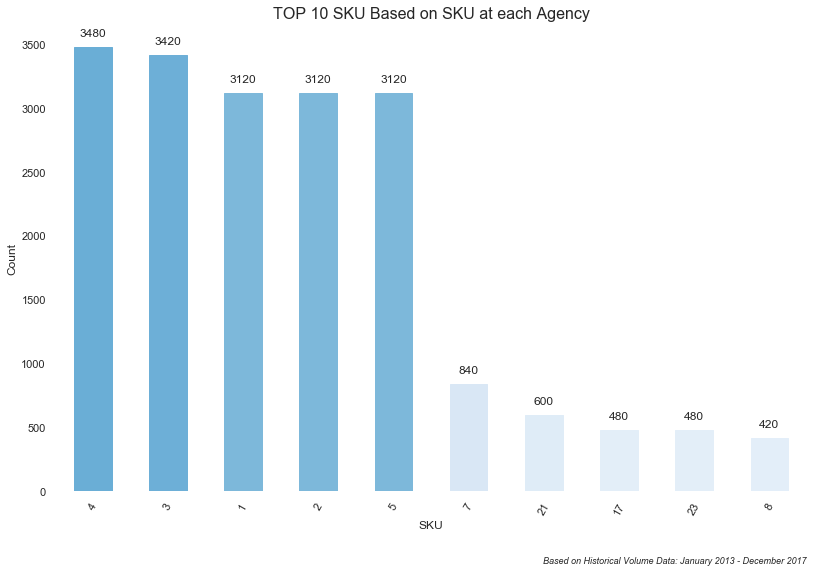

In [232]:
f=df_train.groupby('SKU').size().sort_values(ascending=False)
bar_chart_new(pd.DataFrame(f),0,'blue','TOP 10 SKU Based on SKU at each Agency','Historical Volume')

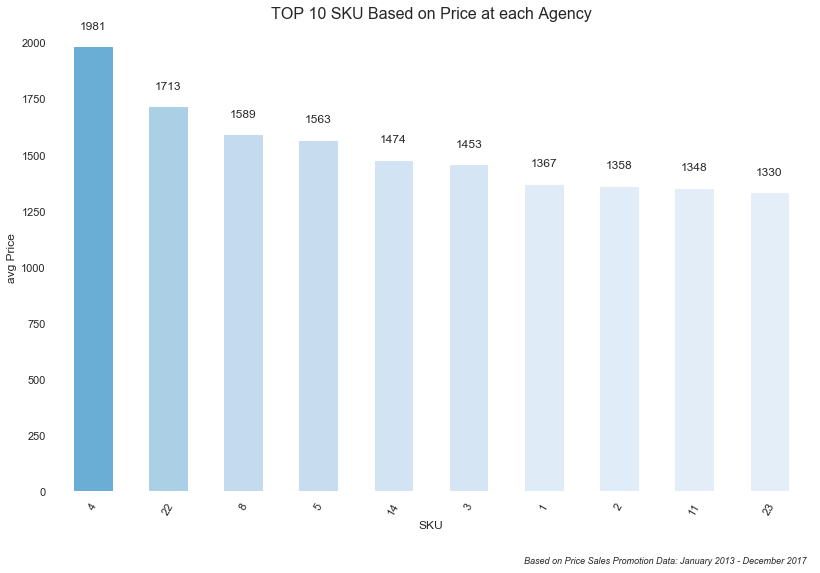

In [240]:

f=df_train.groupby('SKU')['Price'].mean().sort_values(ascending=False)
bar_chart_new(pd.DataFrame(f),"Price",'blue','TOP 10 SKU Based on Price at each Agency','Price Sales Promotion','avg Price')

In [226]:
data.keys()

dict_keys(['demographics', 'event_calendar', 'historical_volume', 'industry_soda_sales', 'industry_volume', 'price_sales_promotion', 'weather'])

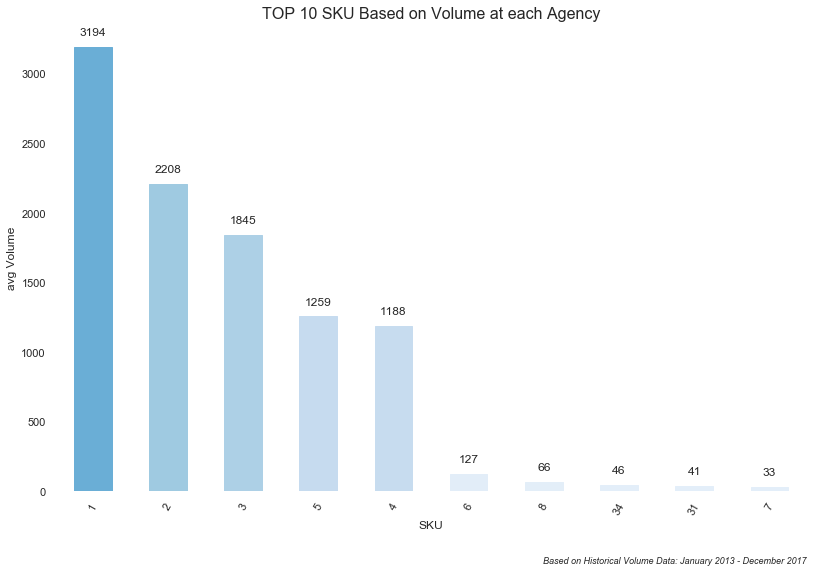

In [241]:
f=df_train.groupby('SKU')['Volume'].mean().sort_values(ascending=False)
bar_chart_new(pd.DataFrame(f),'Volume','blue','TOP 10 SKU Based on Volume at each Agency','Historical Volume', 'avg Volume')

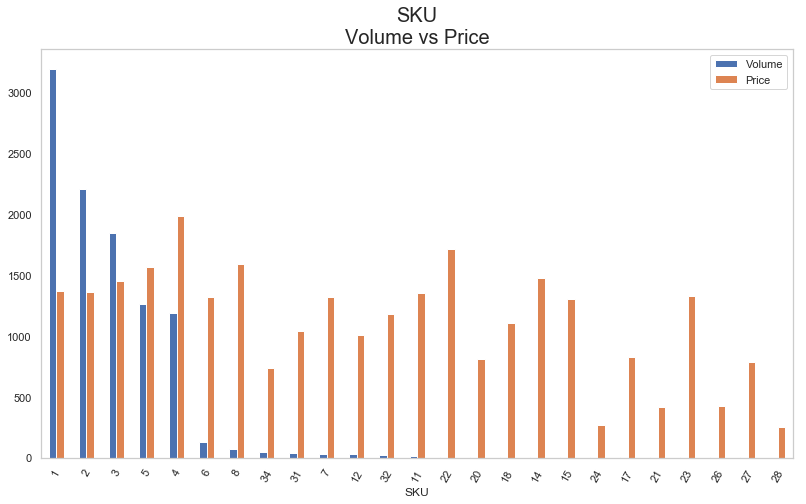

In [281]:
fig,ax=plt.subplots(figsize=[12,7])
df_train.groupby('SKU')['Volume','Price'].mean().sort_values('Volume', ascending=False).plot(kind='bar', ax=ax)
plt.title('SKU\nVolume vs Price', size=20)
plt.xticks(rotation=60)
plt.grid(False)

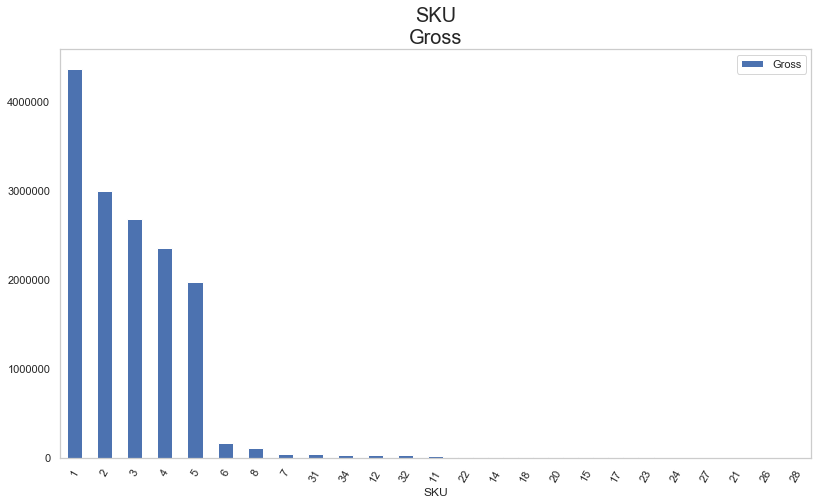

In [350]:
profit=df_train.groupby('SKU')['Volume','Price'].mean()
profit['Gross']=profit['Volume']*profit['Price']

fig,ax=plt.subplots(figsize=[12,7])
profit[['Gross']].sort_values('Gross', ascending=False).plot(kind='bar', ax=ax)
plt.title('SKU\nGross', size=20)
plt.xticks(rotation=60)
plt.grid(False)

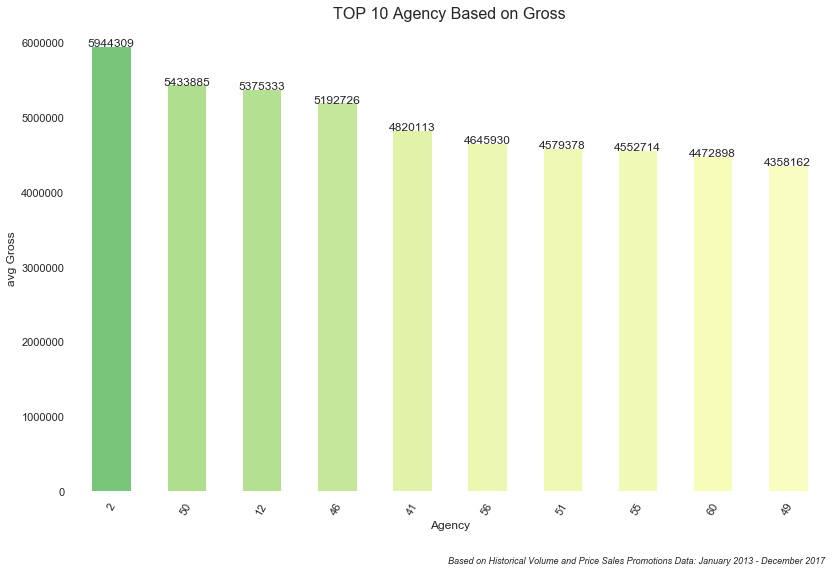

In [348]:
f=df_train.groupby('Agency')['Profit'].mean().sort_values(ascending=False)
bar_chart_new(pd.DataFrame(f),'Profit','green','TOP 10 Agency Based on Gross','Historical Volume and Price Sales Promotions', 'avg Gross')

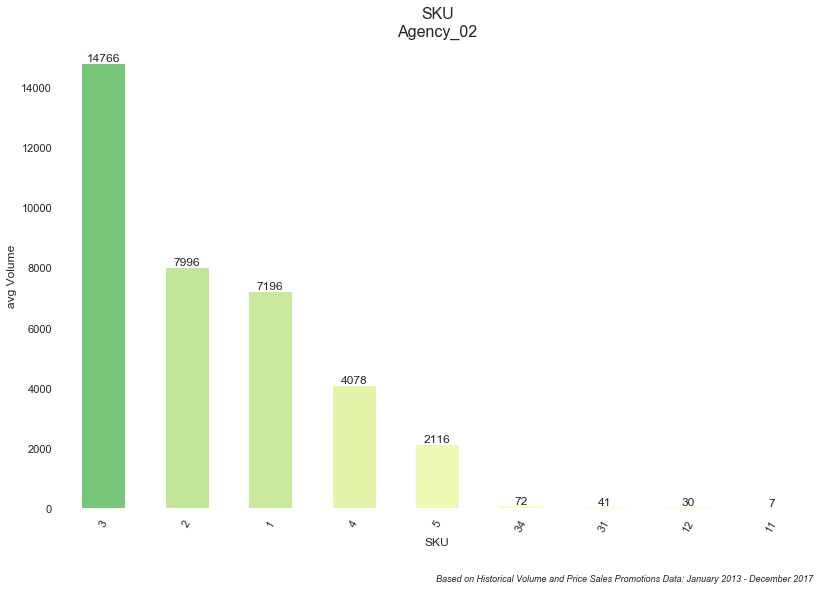

In [317]:
f=df_train[df_train['Agency']==2].groupby('SKU')['Volume'].mean().sort_values(ascending=False)
bar_chart_new(pd.DataFrame(f),'Volume','green','SKU\nAgency_02','Historical Volume and Price Sales Promotions', 'avg Volume')

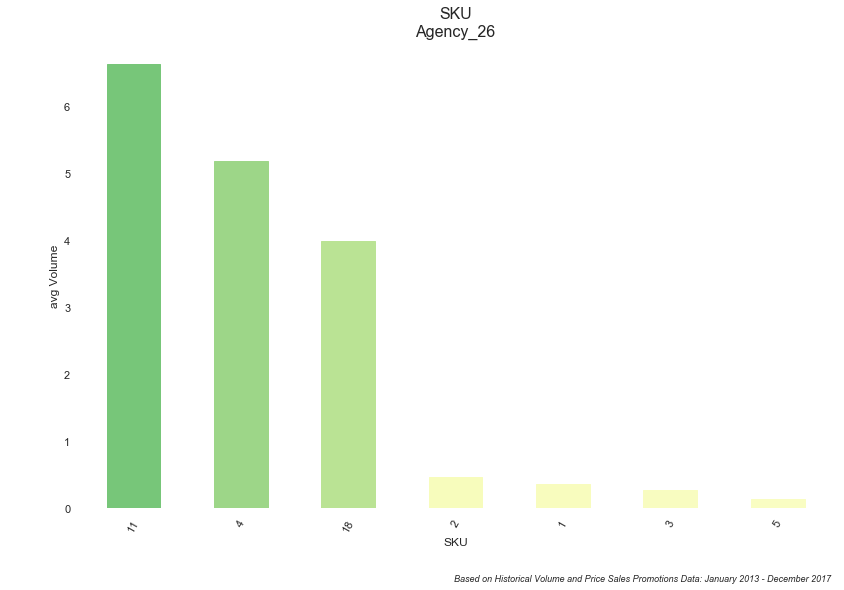

In [321]:
f=df_train[df_train['Agency']==26].groupby('SKU')['Volume'].mean().sort_values(ascending=False)
bar_chart_new(pd.DataFrame(f),'Volume','green','SKU\nAgency_26','Historical Volume and Price Sales Promotions', 'avg Volume')

In [328]:
data['demographics'][data['demographics']['Agency']=='Agency_02']

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
1,Agency_02,3137874,240809


In [329]:
data['demographics'][data['demographics']['Agency']=='Agency_26']

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
52,Agency_26,32267,91330


In [332]:
data['demographics'][data['demographics']['Agency']=='Agency_02']

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
1,Agency_02,3137874,240809


In [367]:
df_train[['Avg_Max_Temp','Avg_Yearly_Household_Income_2017','Avg_Population_2017','event_count','Easter Day', 'Good Friday', 'New Year', 'Christmas', 'Labor Day',
       'Independence Day', 'Revolution Day Memorial', 'Regional Games ',
       'FIFA U-17 World Cup', 'Football Gold Cup', 'Beer Capital',
       'Music Fest','Agency']].dropna().groupby('Agency').mean().sort_values('Avg_Yearly_Household_Income_2017',ascending=False )

,Avg_Max_Temp,Avg_Yearly_Household_Income_2017,Avg_Population_2017,event_count,Easter Day,Good Friday,New Year,Christmas,Labor Day,Independence Day,Revolution Day Memorial,Regional Games,FIFA U-17 World Cup,Football Gold Cup,Beer Capital,Music Fest
Agency,,,,,,,,,,,,,,,,
30,32.061293,247220.0,1094349.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333
16,26.994415,246911.0,1232242.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333
2,33.362926,240809.0,3137874.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333
51,29.454365,238870.0,1750152.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333
55,32.566096,238553.0,2025793.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333
59,26.994415,218902.0,1219986.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333
27,33.980584,218862.0,1588818.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333
3,32.566096,217280.0,1538040.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333
9,34.378156,213511.0,1646094.0,0.75,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.083333,0.083333


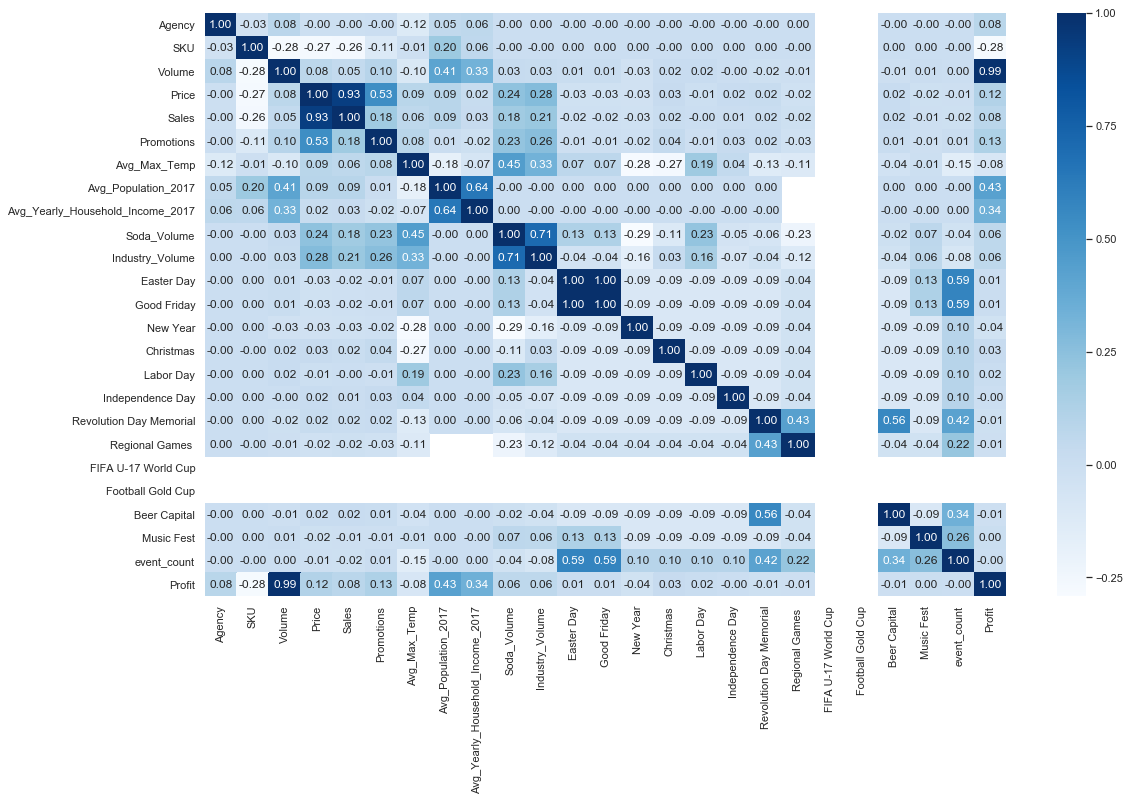

In [371]:
corr_=df_train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "Blues")
# plt.savefig('./result/Data Numeric Corr.png',bbox_inches='tight')

# --===========

In [800]:
data['demographics'].head()

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_05,3044268,182944
1,Agency_02,3137874,240809
2,Agency_55,2025793,238553
3,Agency_53,1729177,111048
4,Agency_50,2057678,144594


In [812]:
data_scatter=data['weather'].groupby('Agency')['Avg_Max_Temp'].mean().reset_index().merge(data['demographics'], on='Agency')
data_scatter

,Agency,Avg_Max_Temp,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_01,26.4548,153733,120207
1,Agency_02,30.2925,3137874,240809
2,Agency_03,29.0065,1538040,217280
3,Agency_04,29.0065,50753,117957
4,Agency_05,29.0079,3044268,182944
5,Agency_06,29.0079,2104390,228353
6,Agency_07,29.4146,1868030,175785
7,Agency_08,29.0079,71662,123610
8,Agency_09,32.9698,1646094,213511
9,Agency_10,29.4146,1716027,117463


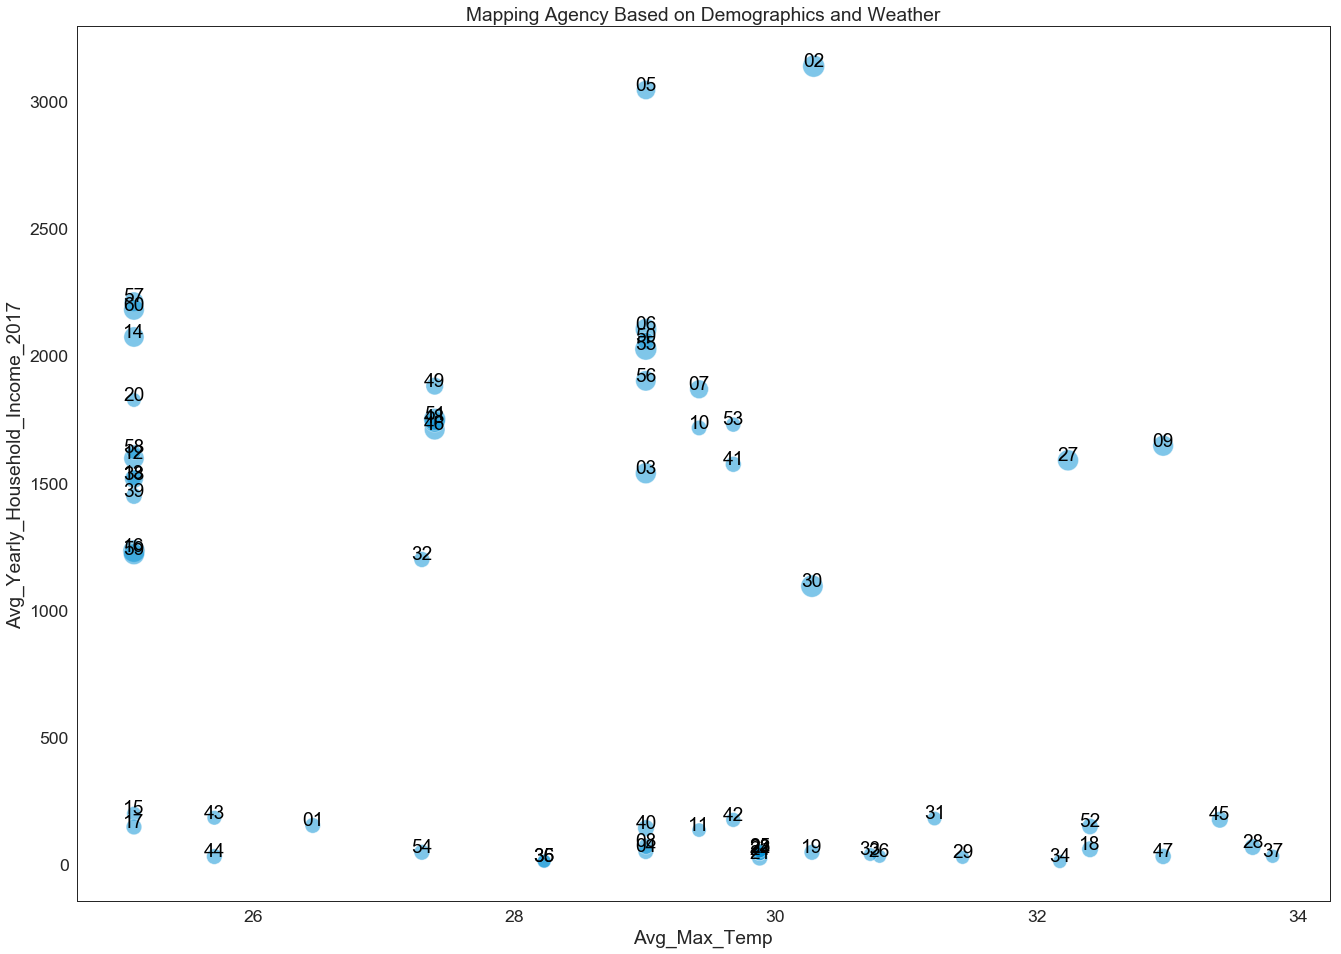

In [821]:
# Load libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

d=data['weather'].groupby('Agency')['Avg_Max_Temp'].mean().reset_index().merge(data['demographics'], on='Agency')

d['Avg_Max_Temp']=d.Avg_Max_Temp
d['Avg_Population_2017']=d.Avg_Population_2017/1000
d['Avg_Yearly_Household_Income_2017']=d['Avg_Yearly_Household_Income_2017']/500

#Create figure
plt.figure(figsize=[20,15])

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(d['Avg_Max_Temp'], d['Avg_Population_2017'], alpha = 0.5, s=d['Avg_Yearly_Household_Income_2017'])

# ax.set_xlim(0,6)
# ax.set_ylim(-2, 18)

#For each point, we add a text inside the bubble
for line in range(0,d.shape[0]):
     ax.text(d['Avg_Max_Temp'][line], d['Avg_Population_2017'][line], d['Agency'][line].replace('Agency_',''), horizontalalignment='center', size='medium', color='black',)

ax.set_title('Mapping Agency Based on Demographics and Weather')
ax.set_ylabel('Avg_Yearly_Household_Income_2017')
ax.set_xlabel('Avg_Max_Temp')

In [811]:
tes

,Agency,Avg_Max_Temp,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_01,0.0000,0.0000,12.0207
1,Agency_02,0.0000,0.0000,24.0809
2,Agency_03,0.0000,0.0000,21.7280
3,Agency_04,0.0000,0.0000,11.7957
4,Agency_05,0.0000,0.0000,18.2944
5,Agency_06,0.0000,0.0000,22.8353
6,Agency_07,0.0000,0.0000,17.5785
7,Agency_08,0.0000,0.0000,12.3610
8,Agency_09,0.0000,0.0000,21.3511
9,Agency_10,0.0000,0.0000,11.7463


# networkx

In [3]:
from dateutil.parser import parse
from pytz import timezone
from bson import json_util
import warnings
from collections import Counter
import matplotlib.colors as clrs
import six
import networkx as nx
from community.community_louvain import (
    partition_at_level,
    modularity,
    best_partition,
    generate_dendrogram,
    induced_graph,
    load_binary,
)

In [71]:
edges=data['historical_volume'][['Agency','SKU']].rename(columns={'Agency':'source','SKU':'target'})
edges=edges.append(edges.rename(columns={'source':'target','target':'source'})).reset_index(drop=True)

In [122]:
la=pd.DataFrame(edges).groupby('target').count().reset_index()[['source','target']]
nd=collections.defaultdict(list)
for i in range(len(la)):
    nd['label'].append(la['target'][i])
    nd['frequency'].append(la['source'][i])
    bagi=10
    if 'Agency' in  la['target'][i]:
        bagi=10
        
    size=la['source'][i]/bagi
    nd['size'].append(size)
    
nodes=pd.DataFrame(nd)
edges=pd.DataFrame(edges)
# nodes=pd.read_csv('nodes_following.csv')
clrs_ = ['tomato','cyan','limegreen','orange','orchid','palegreen','hotpink','yellow']

g = nx.from_pandas_dataframe(edges, source='source', target='target') 
h=pd.DataFrame(g.nodes())
hasil=h.merge(nodes[['size','label']], left_on=0, right_on='label')



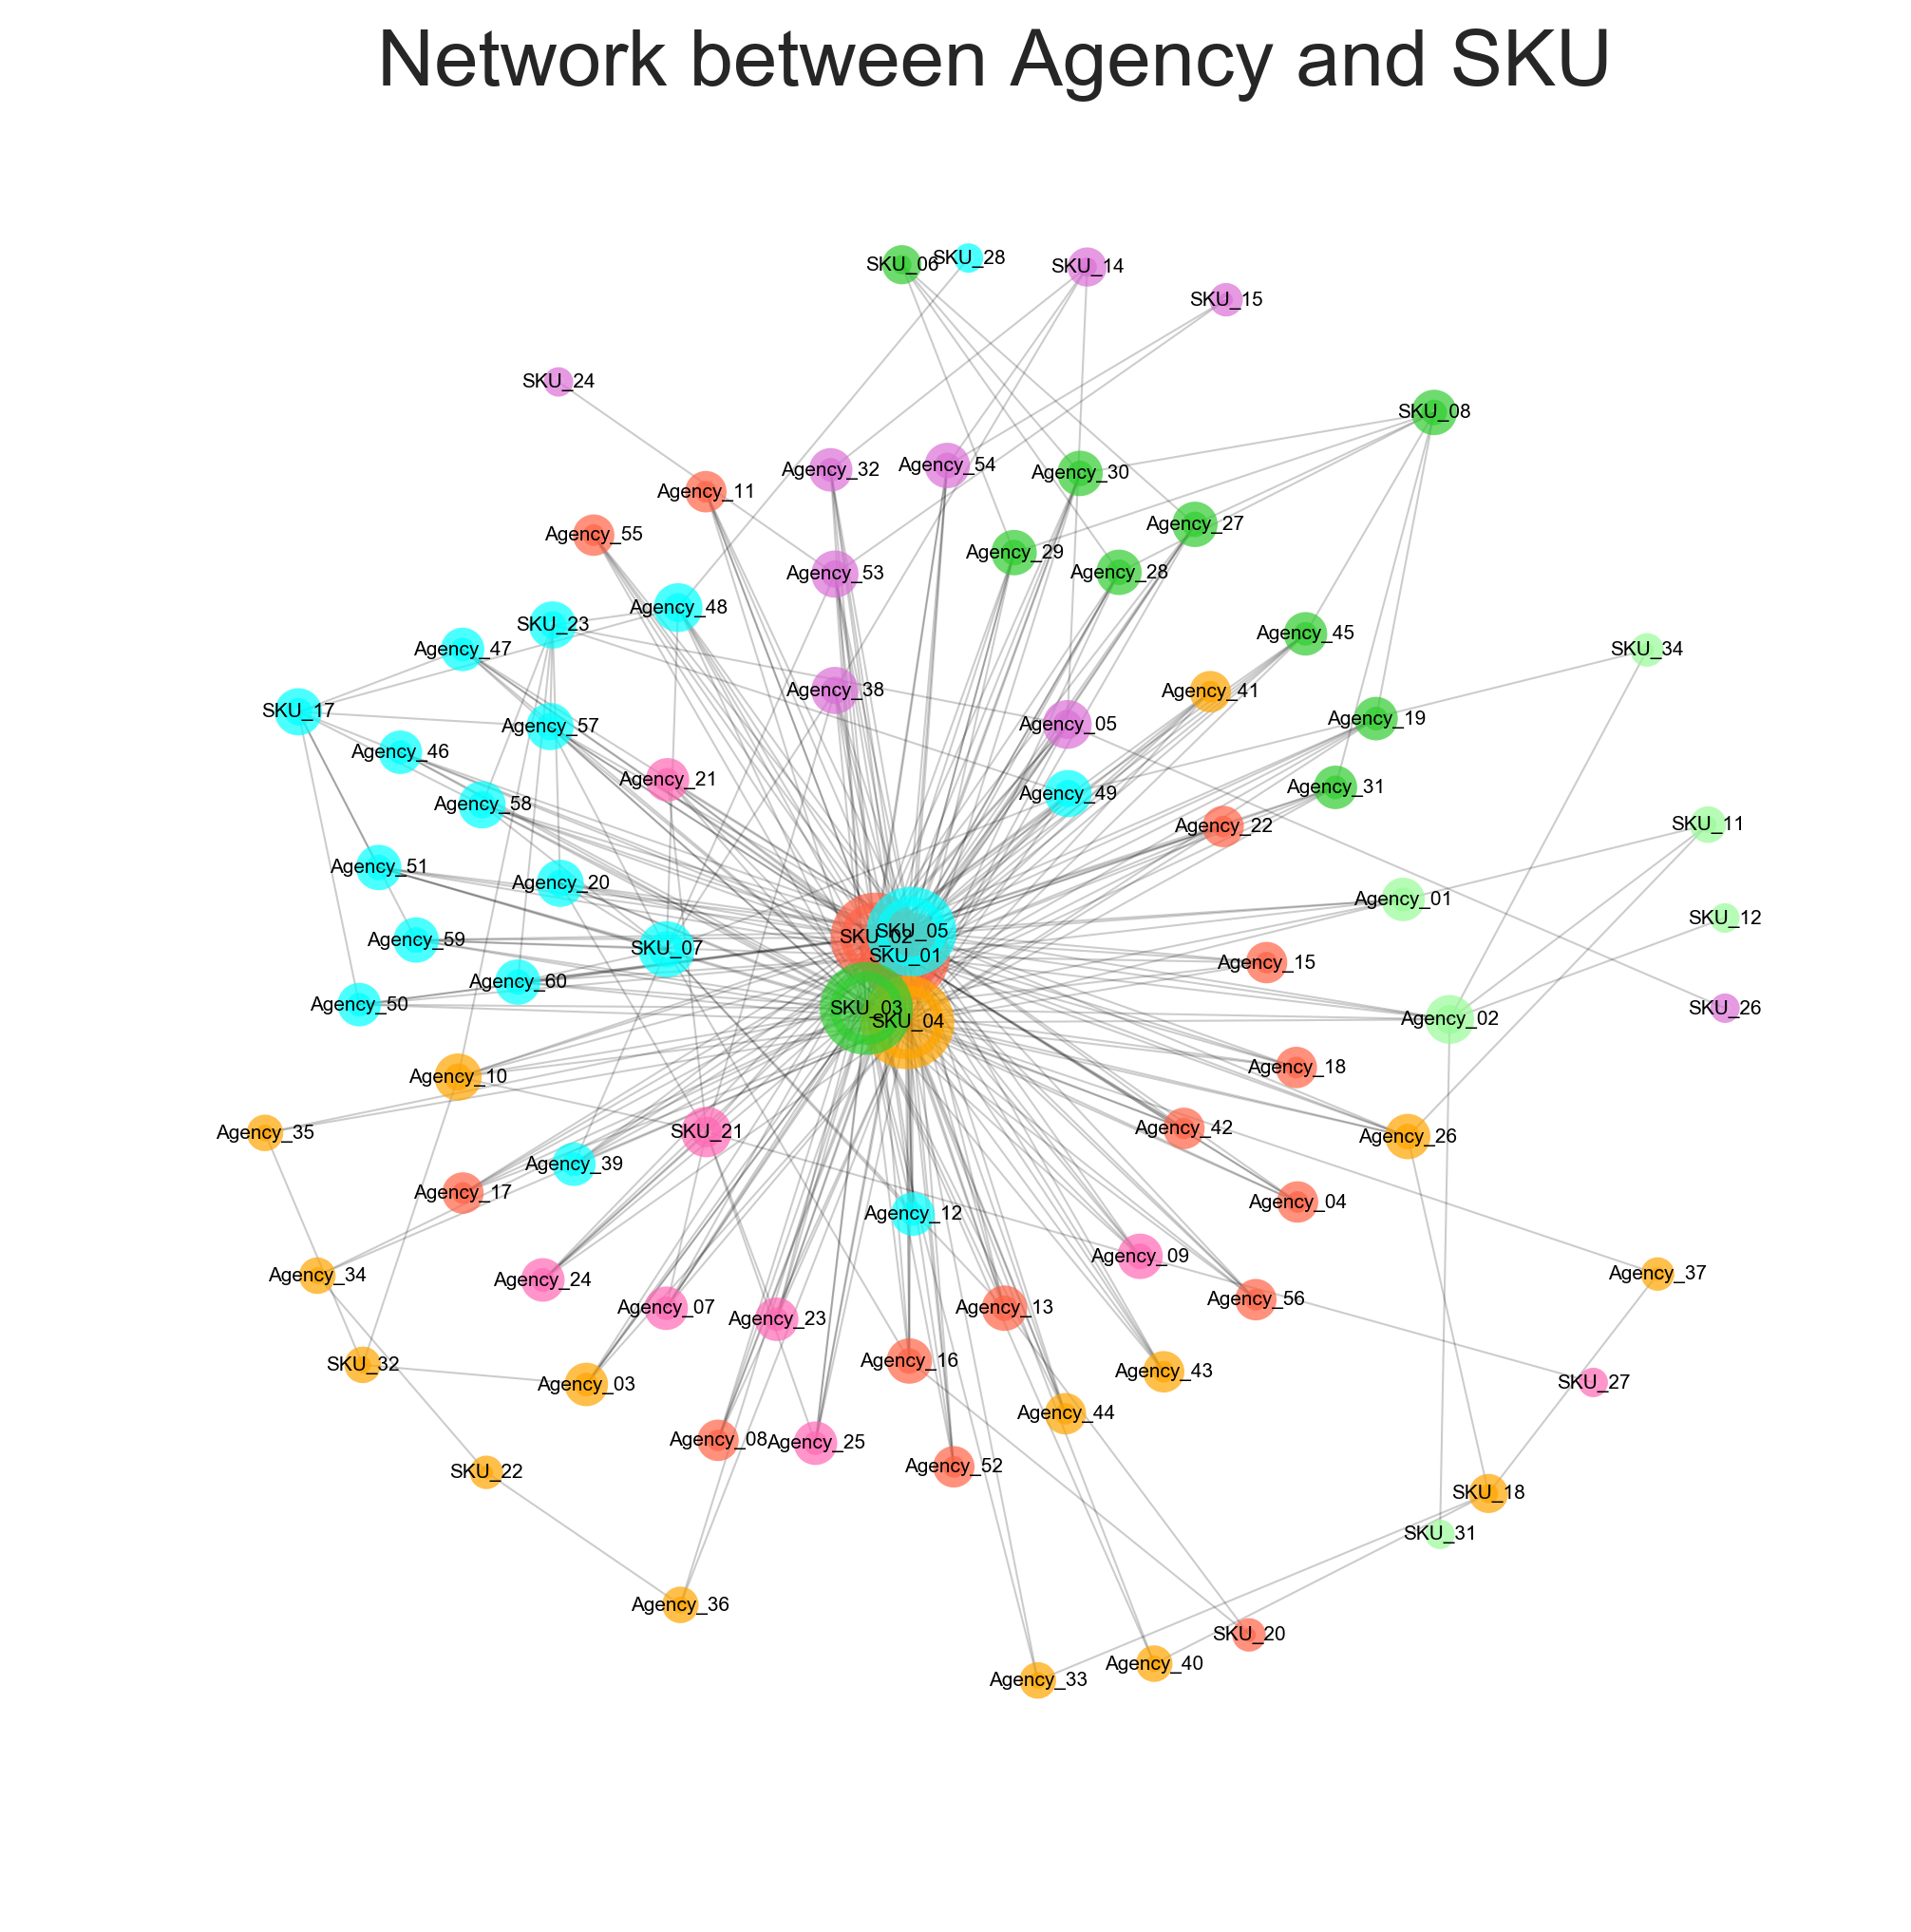

In [137]:
plt.figure(figsize=(8, 8), dpi=300)
layout = nx.spring_layout(g,k=0.17, scale=85.5) #semakin besar, semakin nyebar
# layout = nx.fruchterman_reingold_layout(g,k=0.3, scale=15.5) 
# clubs = [node for node in g.nodes()]
clubs=hasil.label.tolist()
size=hasil['size'].tolist()
# size = list(nodes['size'])
club_dict = dict(zip(clubs, clubs))
part = best_partition(g, resolution=1)
values1 = [part.get(node) for node in g.nodes()]
cmap_fchrulk = clrs.ListedColormap(clrs_[:len(set(part.values()))])
nx.draw_networkx_edges(g, layout, alpha=0.2, width=0.5, arrows=False)
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size,node_color=values1 ,
                        alpha=0.7, linewidths=5, cmap = cmap_fchrulk)
nx.draw_networkx_labels(g, layout, labels=club_dict, font_size=5)

collect=pd.DataFrame(collect, columns=['username','cluster','degree','betweenness','closeness','eigenvector','degree centrality'])
g.name="Network between Agency and SKU"

plt.axis('off')
plt.title("Network between Agency and SKU", fontsize=20)
plt.savefig("Network between Agency and SKU.png",bbox_inches='tight', transparent=True)
plt.show()

In [124]:
dc=nx.degree_centrality(g)
bc=nx.betweenness_centrality(g)
cc=nx.closeness_centrality(g)

In [125]:
df=pd.DataFrame(g.nodes(),columns=['label'])
for i,j in zip([dc,bc,cc],['degree_centrality','betweenness','closeness']):
    temp=pd.DataFrame([i]).T.reset_index().rename(columns={0:j,'index':'label'})
    df=df.merge(temp, on='label')

In [126]:
df.sort_values(list(set(df.columns)-set(['label'])), ascending=False).reset_index(drop=True)

,label,degree_centrality,betweenness,closeness
0,SKU_04,0.707317,0.235956,0.773585
1,SKU_03,0.695122,0.210215,0.759259
2,SKU_01,0.634146,0.136648,0.683333
3,SKU_02,0.634146,0.136648,0.683333
4,SKU_05,0.634146,0.136648,0.683333
5,Agency_02,0.109756,0.067409,0.479532
6,Agency_05,0.109756,0.035187,0.479532
7,Agency_48,0.109756,0.031287,0.479532
8,Agency_53,0.097561,0.037897,0.473988
9,Agency_49,0.097561,0.016224,0.473988


In [288]:
data['demographics']

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017,Year
0,Agency_05,3044268,182944,2017
1,Agency_02,3137874,240809,2017
2,Agency_55,2025793,238553,2017
3,Agency_53,1729177,111048,2017
4,Agency_50,2057678,144594,2017
5,Agency_07,1868030,175785,2017
6,Agency_49,1880416,154532,2017
7,Agency_46,1709754,212229,2017
8,Agency_60,2180611,211936,2017
9,Agency_57,2212416,187351,2017


# why is every early year?

In [147]:
df_train['new year']=df_train['YearMonth'].transform(lambda x: '01-01' in str(x))

In [152]:
df_train.columns

Index(['Agency', 'SKU', 'YearMonth', 'Volume', 'merge_x', 'Price', 'Sales',
       'Promotions', 'merge_y', 'Avg_Max_Temp', 'Avg_Population_2017',
       'Avg_Yearly_Household_Income_2017', 'Soda_Volume', 'Industry_Volume',
       'Easter Day', 'Good Friday', 'New Year', 'Christmas', 'Labor Day',
       'Independence Day', 'Revolution Day Memorial', 'Regional Games ',
       'FIFA U-17 World Cup', 'Football Gold Cup', 'Beer Capital',
       'Music Fest', 'event_count', 'new year'],
      dtype='object')

In [202]:
df_train['month']=df_train.YearMonth.transform(lambda x: str(x)[5:7])

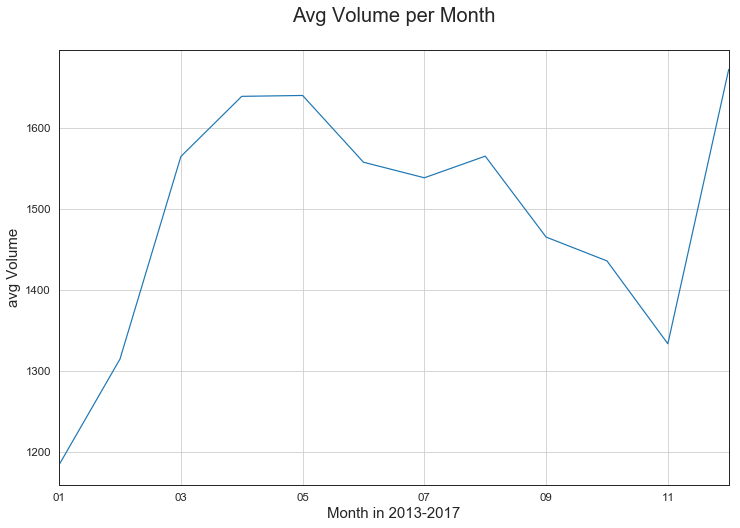

In [208]:

# sns.set_context("paper", font_scale=2.)
# sns.set_style('white')

fig,ax=plt.subplots(figsize=[12,8])
df_train.groupby('month')['Volume'].mean().plot(ax=ax)

plt.title('Avg Volume per Month\n', size=20)
plt.ylabel('avg Volume', size=15)
plt.grid(True)
plt.xlabel('Month in 2013-2017', size=15)

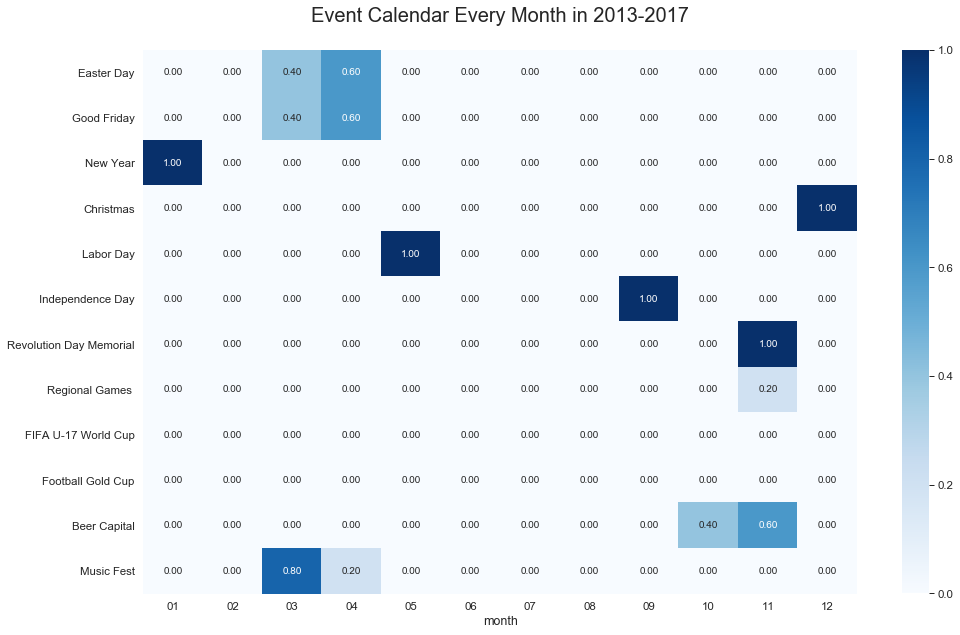

In [212]:
event=df_train.groupby('month')[data['event_calendar'].columns].mean().T
plt.figure(figsize=(16,10))
sns.heatmap(event, annot=True, fmt = ".2f", cmap = "Blues")
plt.title('Event Calendar Every Month in 2013-2017\n', size=20)

In [246]:
data['weather']['month']=data['weather']['YearMonth'].transform(lambda c: str(c)[4:])

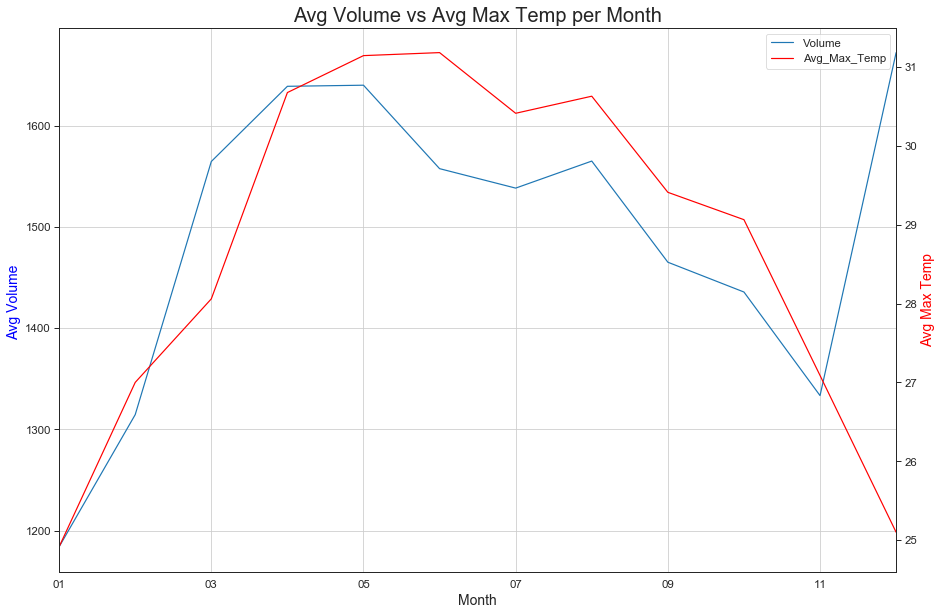

In [250]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(figsize=[15,10])
plt.axis('normal') 

df_train.groupby('month')['Volume'].mean().plot(ax=ax)
ax.set_ylabel("Avg Volume ",fontsize=14, color='b') 

ax2 = ax.twinx() 
data['weather'].groupby('month')['Avg_Max_Temp'].mean().plot( ax=ax2, color='red')
ax2.set_ylabel("Avg Max Temp",fontsize=14,color='red') 

ax.grid(True) 
plt.title("Avg Volume vs Avg Max Temp per Month", fontsize=20) 

ax.set_xlabel('Month', fontsize=14) 
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax.legend(h1+h2,l1+l2)
plt.show()

# cek price per month

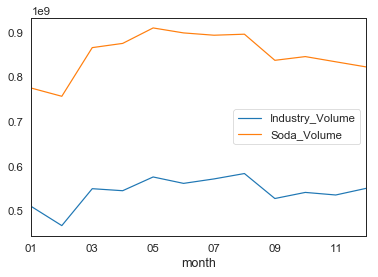

In [264]:
df_train.groupby('month')['Industry_Volume','Soda_Volume'].mean().plot()

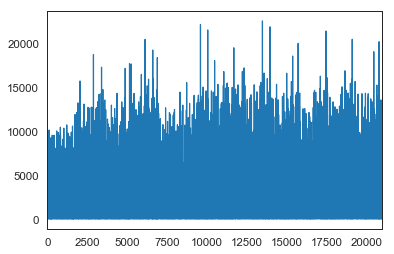

In [265]:
df_train['Volume'].plot()

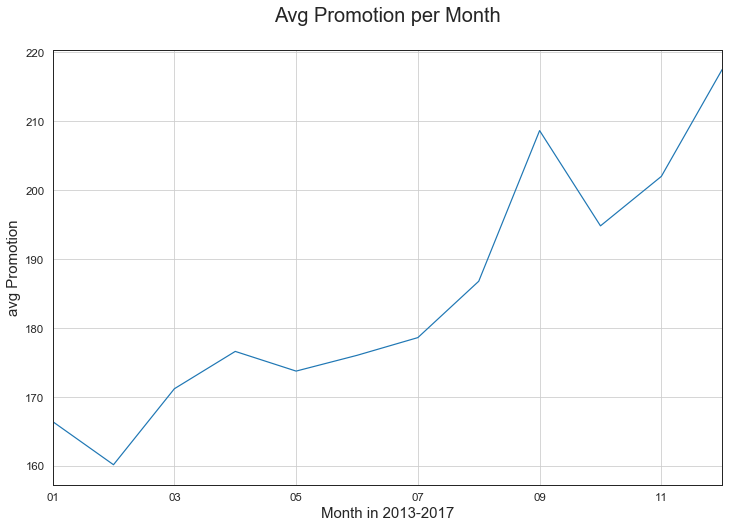

In [275]:
ax,fig=plt.subplots(figsize=[12,8])
df_train.groupby('month')['Promotions'].mean().plot().plot()

plt.title('Avg Promotion per Month\n', size=20)
plt.ylabel('avg Promotion', size=15)
plt.grid(True)
plt.xlabel('Month in 2013-2017', size=15)

In [281]:
data['historical_volume'].groupby(['Agency','SKU']).size().reset_index().groupby('Agency').size().sort_values(ascending=False)

Agency
Agency_02    9
Agency_05    9
Agency_48    9
Agency_58    8
Agency_57    8
Agency_53    8
Agency_49    8
Agency_38    8
Agency_10    8
Agency_20    8
Agency_60    7
Agency_16    7
Agency_29    7
Agency_28    7
Agency_27    7
Agency_26    7
Agency_59    7
Agency_13    7
Agency_30    7
Agency_09    7
Agency_51    7
Agency_54    7
Agency_19    6
Agency_21    6
Agency_23    6
Agency_24    6
Agency_25    6
Agency_07    6
Agency_03    6
Agency_12    6
Agency_31    6
Agency_32    6
Agency_39    6
Agency_50    6
Agency_47    6
Agency_46    6
Agency_45    6
Agency_01    6
Agency_22    5
Agency_44    5
Agency_56    5
Agency_55    5
Agency_04    5
Agency_52    5
Agency_08    5
Agency_11    5
Agency_15    5
Agency_17    5
Agency_18    5
Agency_42    5
Agency_41    5
Agency_43    5
Agency_40    3
Agency_36    3
Agency_35    3
Agency_33    3
Agency_34    3
Agency_37    2
dtype: int64

In [313]:
data['demographics']

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_05,3044268,182944
1,Agency_02,3137874,240809
2,Agency_55,2025793,238553
3,Agency_53,1729177,111048
4,Agency_50,2057678,144594
5,Agency_07,1868030,175785
6,Agency_49,1880416,154532
7,Agency_46,1709754,212229
8,Agency_60,2180611,211936
9,Agency_57,2212416,187351
